# Apply 

In [1]:
import pandas as pd

import utils

In [2]:
filenames = ['data/measured_real_power.csv',
             'data/measured_reactive_power.csv']

df = utils.read_dir(filenames)
df.shape

(12961, 40)

Multiple Index Values

In [3]:
sorted(df.columns, key=lambda x: x[-2:])[:4]

['measured_real_power:triplex_meter_10',
 'measured_reactive_power:triplex_meter_10',
 'measured_real_power:triplex_meter_11',
 'measured_reactive_power:triplex_meter_11']

What is the `real` and `reactive` timeseries for `triplex_meter_5`?

In [4]:
cols = [ x for x in df.columns if x.endswith('triplex_meter_5')]
cols

['measured_real_power:triplex_meter_5',
 'measured_reactive_power:triplex_meter_5']

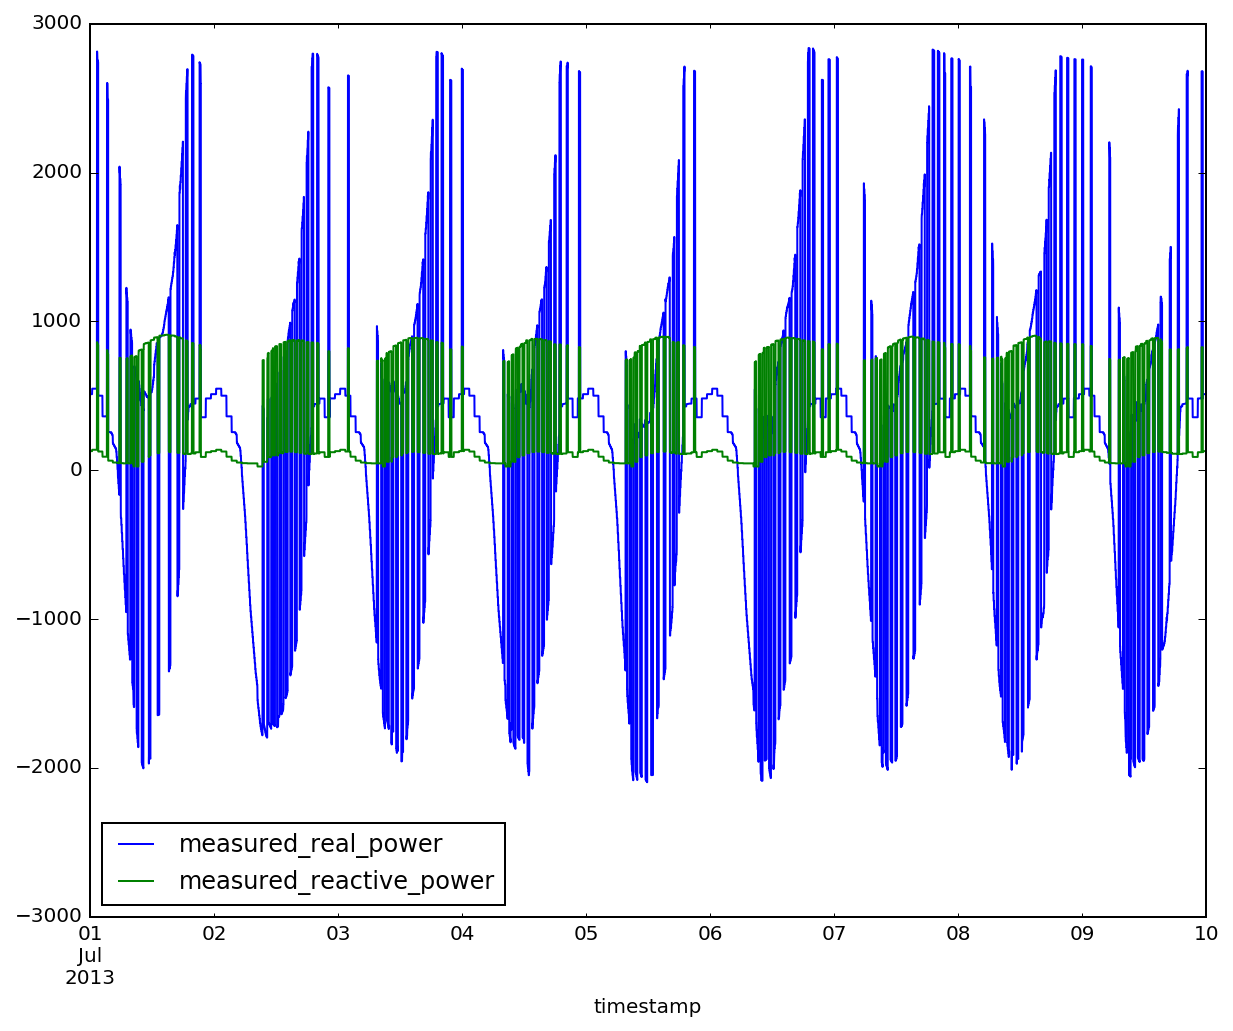

In [5]:
tm5 = df[cols]
tm5.columns = ['measured_real_power', 'measured_reactive_power']
_ = tm5.plot()

## The `apply` function 

In [6]:
def func(x):
    return "just a string"
    
tm5.apply(func)

measured_real_power        just a string
measured_reactive_power    just a string
dtype: object

In [7]:
tm5.apply(lambda x: "another string", axis=1).head()

timestamp
2013-07-01 00:00:00    another string
2013-07-01 00:01:00    another string
2013-07-01 00:02:00    another string
2013-07-01 00:03:00    another string
2013-07-01 00:04:00    another string
dtype: object

In [8]:
tmp = tm5.copy()
tmp['func'] = tmp.apply(func, axis=1)
tmp.head()

,measured_real_power,measured_reactive_power,func
timestamp,,,
2013-07-01 00:00:00,510.912,128.047,just a string
2013-07-01 00:01:00,510.912,128.047,just a string
2013-07-01 00:02:00,510.912,128.047,just a string
2013-07-01 00:03:00,510.912,128.047,just a string
2013-07-01 00:04:00,510.911,128.046,just a string


How about the `row` magnitude of `real` and `reactive`?

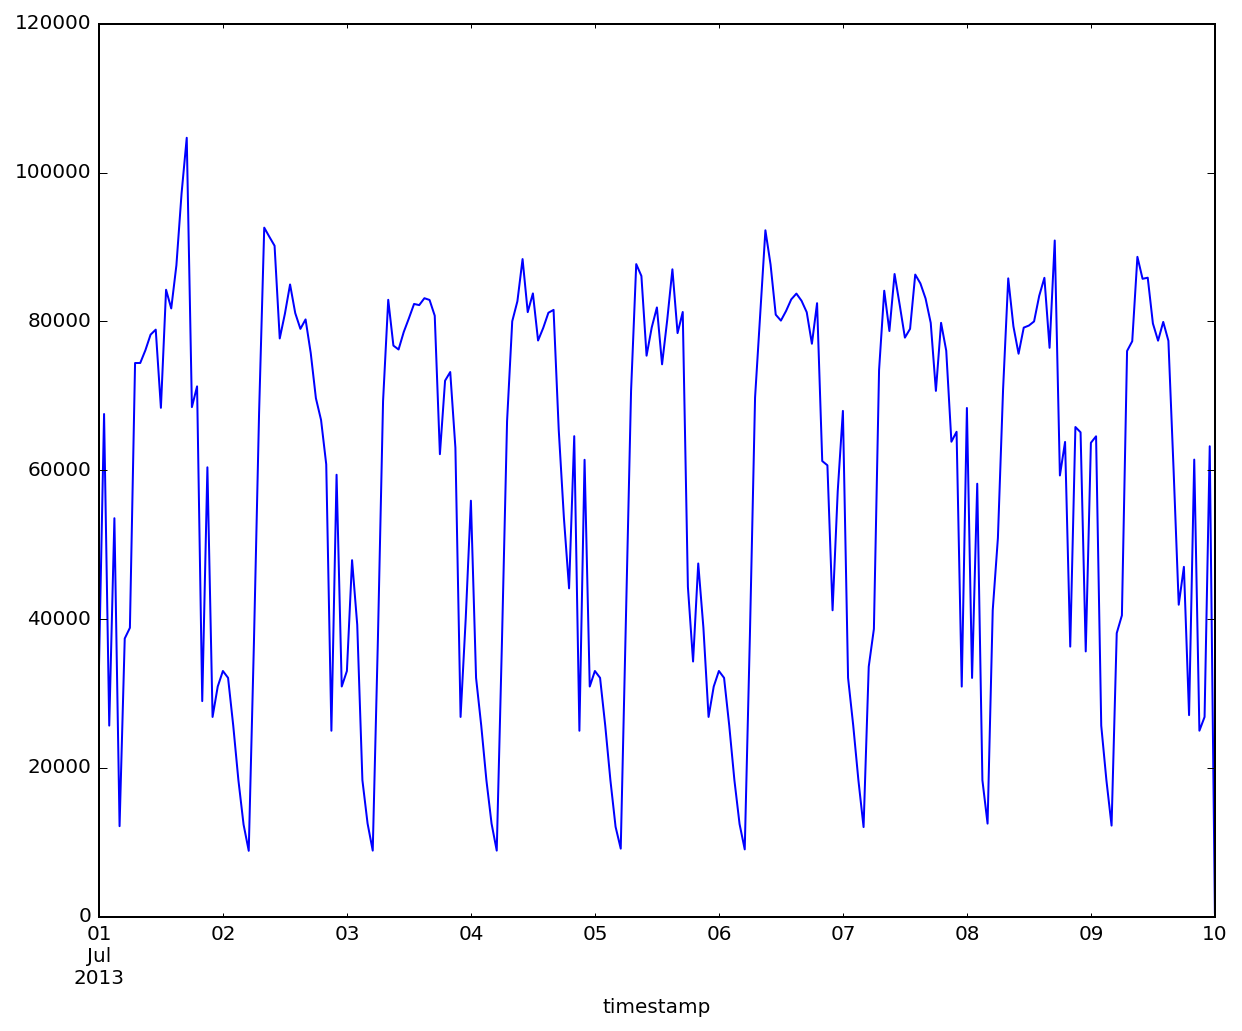

In [9]:
def row_mag(x):
    return abs(complex(x['measured_real_power'], x['measured_reactive_power']))

tm5.apply(row_mag, axis=1).resample('60min').sum().plot()

Two other methods

In [10]:
import math

def row_mag_basic(x):
    return math.sqrt(x['measured_real_power']*x['measured_real_power'] + 
                     x['measured_reactive_power']*x['measured_reactive_power'])

def compute_mag(df):
    total =  (df['measured_real_power']*df['measured_real_power'] + 
              df['measured_reactive_power']*df['measured_reactive_power'])
    
    return total.apply(math.sqrt)

We cannot do:
    
```python
        math.sqrt(total)
```
but we can `apply` it.

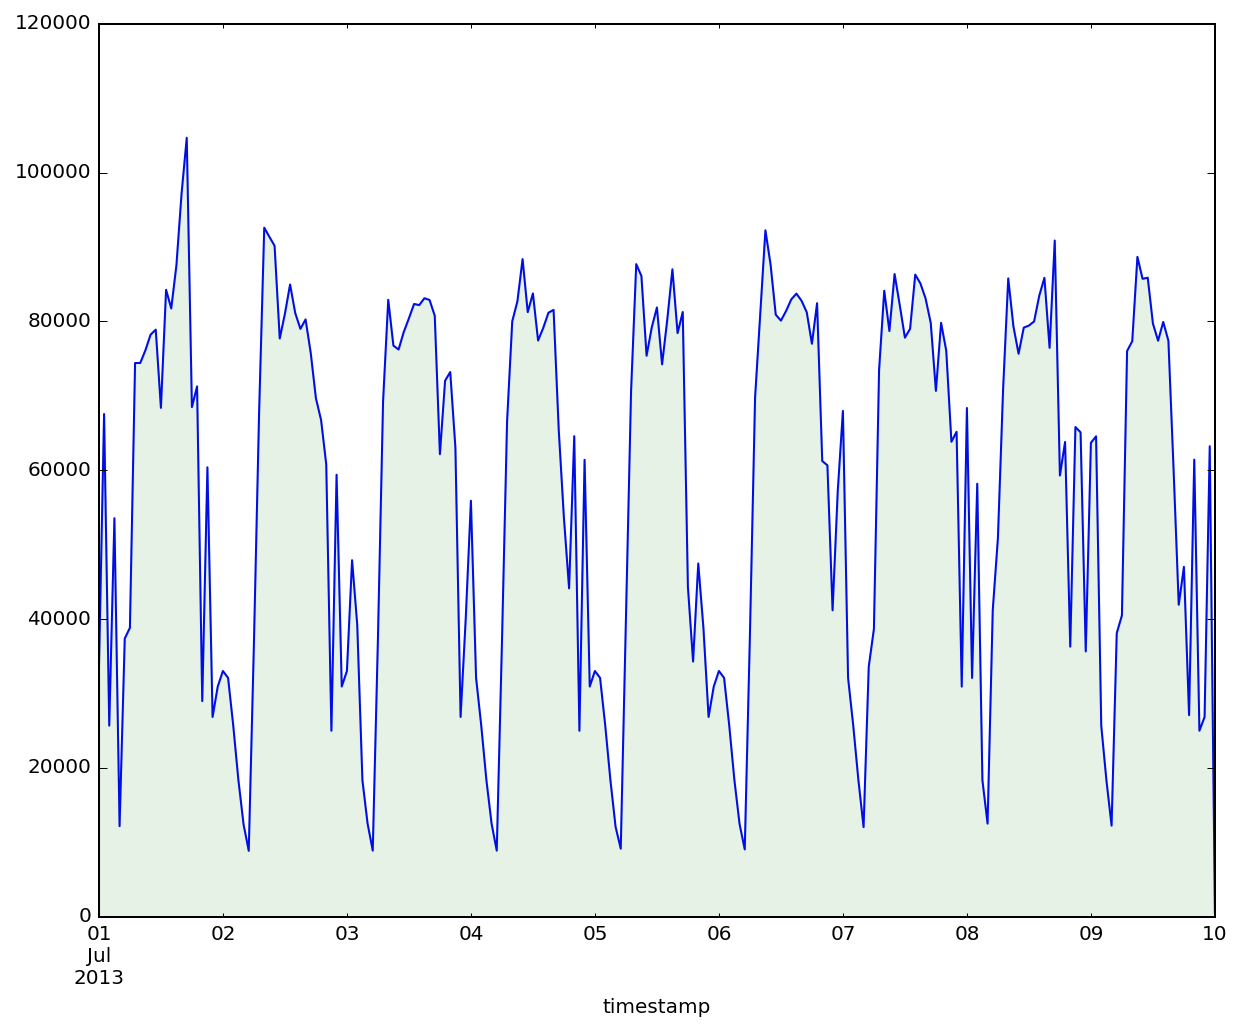

In [11]:
tm5.apply(row_mag, axis=1).resample('60min').sum().plot()
compute_mag(tm5).resample('60min').sum().plot(kind='area', alpha=0.1)

In [12]:
%timeit tm5.apply(row_mag, axis=1)

1 loop, best of 3: 288 ms per loop


In [ ]:
%timeit tm5.apply(row_mag_basic, axis=1)

1 loop, best of 3: 510 ms per loop


In [ ]:
%timeit compute_mag(tm5)

Pandas stores data in `column-wise` numpy arrays.